## Логистическая регрессия

В этом практическом задании три обязательных и одна дополнительная задача. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
*Дополнительная задача* для тех, кто хочет потренироваться в подготовке данных для обучения модели. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться пользоваться моделью логистической регрессии.
2.   Потренироваться в обучении модели с фичами разного типа.
3.   Научиться получать вероятности на выходе из логистической регрессии.




Мы будем решать задачу по прогнозированию вероятности инсульта у пациента на основе его входных параметров.

По данным Всемирной организации здравоохранения, инсульт является второй ведущей причиной смерти в мире, на его долю приходится примерно 11% от общего числа смертей. Именно поэтому раннее прогнозирование возникновения инсульта у пациента является актуальной для здравоохранения задачей.


Описание данных: 

*gender*: пол;

*age*: возраст;

*hypertension*: страдает ли пациент гипертонией;

*heart_disease*: есть ли болезни сердца;

*ever_married*: был ли женат/замужем;

*work_type*: тип работы;

*Residence_type*: проживает в городе или селе;

*avg_glucose_level*: средний уровень глюкозы;

*bmi*: индекс массы тела;

*smoking_status*: информация о курении;

*stroke*: целевая переменная — был инсульт или нет.

## Обязательные задачи

In [121]:
# импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 

In [122]:
# загрузим датасет
df = pd.read_csv('data/stroke_data.csv')
print(df.shape)
df.head()

(4000, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0


**Задача 0. Первая модель логистической регрессии**

Воспроизведите обучение модели логистической регрессии из видео. Для этого:
- поделите данные из df на треин и тест в отношении 70/30;
- инициализируйте модель логистической регрессии с дефолтными параметрами;
- обучите модель на одной колонке из тренировочных данных: `age`;
- сделайте предсказание для тестовых данных и посчитайте значение метрики точности, а также выведите confusion matrix.

In [123]:
# Ваш код здесь
# посчитаем количества уникальных значений в df.stroke
df.stroke.value_counts()

0    2027
1    1973
Name: stroke, dtype: int64

In [124]:
# проверим, ести ли пропущенные значения в датасете
# команда any проверяет все записи по каждой колонке, если найдет хоть один пропуск - выдаст True
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

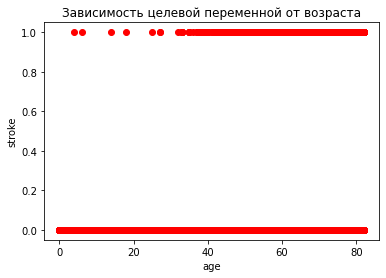

In [125]:
# нарисуем график зависимости возраста от целевой переменной stroke
plt.plot(df['age'], df.stroke, 'ro') 
plt.xlabel('age')
plt.ylabel('stroke')
plt.title('Зависимость целевой переменной от возраста')
plt.show()

In [126]:
# подготовим данные для обучения
x = df.drop(['stroke'], axis=1)
y = df.stroke

In [127]:
# разделим данные на тренировочный и тестовый сеты в соотношении 70 на 30
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [128]:
# вызовим модуль логистической регрессии
logreg = LogisticRegression()

In [129]:
# обучим модель на примере одной переменной "возраст"
train_cols = ['age']
logreg.fit(train_x[train_cols], train_y)

LogisticRegression()

In [130]:
# найдем предикт на тестовых данных и выведим метрику точности модели
pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.7683333333333333

In [131]:
# выведем матрицу ошибок
confusion_matrix(test_y, pred)

array([[448, 156],
       [122, 474]], dtype=int64)

**Задача 1. Логистическая регрессия на количественных и бинарных фичах**

Попробуйте обучить логистическую регрессию, добавив в нее остальные количественные фичи. Для этого проделайте следующее:
- найдите количественные фичи (это фичи, которые могут принимать любые числовые значения, количество их возможных значений НЕ конечно);
- обучите на них модель логистической регрессии, и замерьте качество;
- добавьте все бинарные фичи в обучение (бинарные фичи — те, которые могут принимать только два значения);
- обучите на них модель логистической регрессии и замерьте качество.


*Заметка:* обратите внимание на колонку `gender`. В ней есть одна запись, которая заполнена неверно. Удалите эту запись прежде, чем обучать модели в этом задании.

In [132]:
# Ваш код здесь
# обучим модель на примере одной переменной 'age', 'avg_glucose_level' 
train_cols = ['age', 'avg_glucose_level']
logreg.fit(train_x[train_cols], train_y)

LogisticRegression()

In [133]:
# найдем предикт на тестовых данных и выведим метрику точности модели
pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.7741666666666667

In [134]:
# выведем матрицу ошибок
confusion_matrix(test_y, pred)

array([[449, 155],
       [116, 480]], dtype=int64)

In [135]:
# обучим модель на примере одной переменной ['age', 'avg_glucose_level', 'bmi'] 
train_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
             'ever_married', 'Residence_type']
logreg.fit(train_x[train_cols], train_y)

C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
# найдем предикт на тестовых данных и выведим метрику точности модели
pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.81

In [137]:
# выведем матрицу ошибок
confusion_matrix(test_y, pred)

array([[482, 122],
       [106, 490]], dtype=int64)

In [138]:
# обратите внимание на колонку gender. В ней есть одна запись, которая заполнена неверно.
# посчитаем количества уникальных значений в df.gender
df.gender.value_counts()

Male      2141
Female    1858
255          1
Name: gender, dtype: int64

In [139]:
# выведем и удалим строку где df['gender'] == '255'
print(df.loc[df['gender'] == '255'])
df = df[df['gender'] != '255']
df.shape

     gender  age  hypertension  heart_disease  ever_married work_type  \
1783    255   26             0              0             0   Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
1783               0             143.33  22.4  formerly smoked       0  


(3999, 11)

In [140]:
# закодируем {'Male': 1, 'Female': 0}
df.gender = df.gender.replace({'Male': 1, 'Female': 0})
print(df.gender.value_counts())

# подготовим данные для обучения
x = df.drop(['stroke'], axis=1)
y = df.stroke


1    2141
0    1858
Name: gender, dtype: int64


In [141]:
# обучим модель на примере одной переменной ['age', 'avg_glucose_level', 'bmi'] 
train_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
             'ever_married', 'Residence_type']
logreg.fit(train_x[train_cols], train_y)

# найдем предикт на тестовых данных и выведим метрику точности модели
pred = logreg.predict(test_x[train_cols])
print('ACC= ', accuracy_score(test_y, pred))

# выведем матрицу ошибок
print('confusion_matrix= ', confusion_matrix(test_y, pred))



ACC=  0.81
confusion_matrix=  [[482 122]
 [106 490]]


C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задача 2. Предсказание вероятностей с помощью логистической регрессии**

Проверьте, что алгоритм логистической регрессии использует порог=0.5 для предсказания классов. Для этого проделайте следующее:

- Возьмите последнюю обученную модель на бинарных и количественных фичах из предыдущего задания и предскажите вероятности для тестовой выборки с помощью метода `predict_proba`.
- Также с помощью этой обученной модели предскажите классы для тестовой выборки и положите в `pred`.
- Сохраните вероятности в отдельную переменную `pred_probs`.
- Напишите функцию `predict_class(pred_probs, trsh)`, которая пробегает по всем элементам в `pred_probs` и на выходе отдаёт список сформированных из вероятностей классов. Функция должна пробегать по всем элементам в `pred_probs`. Если видит значение вероятности в классе 0 больше trsh (в данном случае 0.5) возвращается класс 1, в противном случае — 0.
- Примените функцию `predict_class` к `pred_probs`. Результат сохраните в `pred_class`.
- Убедитесь, что векторы `pred_class` и  `pred` совпали.
- Попробуйте другие значения порога `trsh` для предсказания класса. Какое значение `trsh` даёт увеличение точности на текущей тестовой выборке?


In [142]:
# predict_proba() – значения вероятностей для каждого наблюдения
# то есть выдать «степень уверенности» в ответе (вероятность)
pred_probs = logreg.predict_proba(test_x[train_cols])



In [143]:
# Функция пробегает по всем элементам 
# в pred_probs и на выходе отдаёт список сформированных 
# из вероятностей классов. Если видит значение вероятности в 
# классе 0 больше trsh (в данном случае 0.5) возвращается класс 1, в противном случае — 0.
def predict_class(pred_probs, trsh=0.5):
  return [0 if x[0]>trsh else 1 for x in pred_probs]

In [144]:
# Примените функцию predict_class к pred_probs. Результат сохраните в pred_class
pred_class = predict_class(pred_probs)


In [145]:
# убеждаемся, что векторы pred_class и pred совпали
list(pred) == pred_class

True

In [146]:
# тут могут быть разные значения trsh
pred_class = predict_class(pred_probs, 0.50)
accuracy_score(test_y, pred_class)

0.81

## Дополнительные задачи

Добавьте в обучение модели оставшиеся категориальные фичи. Обучите модель логистической регрессии на всех данных, проверьте её качество.

In [147]:
# укажем, какие колонки надо закодировать
cat_cols = ['smoking_status', 'work_type']

In [148]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
train_enc = pd.DataFrame(ohe.fit_transform(train_x[cat_cols]).toarray(),)
test_enc = pd.DataFrame(ohe.transform(test_x[cat_cols]).toarray(),)

train_enc.head()


,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
# вставим закодированные столбцы и удалим их аналог в train_x
train_x = train_x.join(train_enc.set_index(train_x.index)).drop(cat_cols, axis=1)

# вставим закодированные столбцы и удалим их аналог в train_x
test_x = test_x.join(test_enc.set_index(test_x.index)).drop(cat_cols, axis=1)
train_x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,0,1,2,3,4,5,6,7,8
3215,Male,73,0,0,1,0,219.725091,31.103826,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3126,Male,61,0,0,1,0,76.115181,27.721713,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
697,Male,62,0,0,1,0,206.851644,30.470874,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3613,Female,44,0,0,0,1,127.210000,29.800000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2374,Male,65,0,0,1,0,116.773315,31.763908,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
test_x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,0,1,2,3,4,5,6,7,8
555,Male,39,0,0,1,0,71.300000,34.700000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3491,Female,17,0,0,0,1,104.020000,26.100000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
527,Female,40,0,0,1,0,131.990000,37.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3925,Male,45,0,0,1,0,64.140000,29.400000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2989,Male,71,0,0,1,1,102.426131,27.035604,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,Male,76,0,0,1,0,60.832136,28.985961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
226,Female,51,0,0,1,0,76.350000,33.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1612,Female,28,1,0,0,0,80.400000,57.500000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
535,Male,3,0,0,0,1,105.340000,15.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
# обучим модель на примере одной переменной ['age', 'avg_glucose_level', 'bmi'] 
train_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease',
             'ever_married', 'Residence_type', 0, 1, 2, 3, 4, 5, 6, 7, 8]
logreg.fit(train_x[train_cols], train_y)

# найдем предикт на тестовых данных и выведим метрику точности модели
pred = logreg.predict(test_x[train_cols])
print('ACC= ', accuracy_score(test_y, pred))

# выведем матрицу ошибок
print('confusion_matrix= ', confusion_matrix(test_y, pred))

ACC=  0.83
confusion_matrix=  [[489 115]
 [ 89 507]]


C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-

-

-

-

-

In [ ]:
# Решение (Задача 0)
x = df.drop(['stroke'], axis=1)
y = df.stroke

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)


logreg = LogisticRegression()
train_cols = ['age']
logreg.fit(train_x[train_cols], train_y)

pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.7683333333333333

In [ ]:
confusion_matrix(test_y, pred)

array([[448, 156],
       [122, 474]])

-

-

-

In [ ]:
# Решение (Задача 1)
df.gender.value_counts()

Male      2141
Female    1858
255          1
Name: gender, dtype: int64

In [ ]:
df = df[df.gender !='255']
x = df.drop(['stroke'], axis=1)
y = df.stroke

In [ ]:
df.gender = df.gender.replace({'Male': 1, 'Female': 0})
df.gender.value_counts()

1    2141
0    1858
Name: gender, dtype: int64

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

num_cols = ['age', 'bmi', 'avg_glucose_level']
logreg.fit(train_x[num_cols], train_y)

pred = logreg.predict(test_x[num_cols])
accuracy_score(test_y, pred)

0.7766666666666666

In [ ]:
confusion_matrix(test_y, pred)

array([[439, 146],
       [122, 493]])

In [ ]:
binary_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married','Residence_type']
logreg.fit(train_x[num_cols + binary_cols], train_y)

pred = logreg.predict(test_x[num_cols + binary_cols])
accuracy_score(test_y, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8075

In [ ]:
confusion_matrix(test_y, pred)

array([[470, 115],
       [116, 499]])

-

-

-

In [ ]:
# Решение (Задача 2)
logreg = LogisticRegression()

logreg.fit(train_x[num_cols + binary_cols], train_y)
pred = logreg.predict(test_x[num_cols + binary_cols])
pred_probs = logreg.predict_proba(test_x[num_cols + binary_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def predict_class(pred_probs, trsh=0.5):
  return [0 if x[0]>trsh else 1 for x in pred_probs]

In [ ]:
pred_class = predict_class(pred_probs)

In [ ]:
list(pred) == pred_class

True

In [ ]:
# тут могут быть разные значения trsh
pred_class = predict_class(pred_probs, 0.6)
accuracy_score(test_y, pred_class)

0.815

Замечание: манипулировать порогом нужно осторожно. Если вы выбрали новое значение порога, например = 0.6, убедитесь, что на тренировочной выборке этот порог также даёт прирост в качестве модели. Иначе вы просто «подгоните» порог для своих текущих тестовых данных.

-

-

-

In [ ]:
# Решение (Дополнительная задача)
cat_cols = ['smoking_status', 'work_type']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
train_enc = pd.DataFrame(ohe.fit_transform(train_x[cat_cols]).toarray(),)
test_enc = pd.DataFrame(ohe.transform(test_x[cat_cols]).toarray(),)

train_enc.head()

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_x = train_x.join(train_enc.set_index(train_x.index)).drop(cat_cols, axis=1)
test_x = test_x.join(test_enc.set_index(test_x.index)).drop(cat_cols, axis=1)
train_x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,0,1,2,3,4,5,6,7,8
1830,1,61,1,1,0,0,148.240000,32.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3392,1,74,1,0,1,0,194.779099,30.827056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3624,1,80,0,0,1,1,73.479402,24.190924,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1954,0,73,0,0,1,0,98.340000,30.900000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1037,1,80,0,0,1,1,248.408053,29.305082,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
accuracy_score(test_y, pred)

0.8241666666666667

In [ ]:
confusion_matrix(test_y, pred)

array([[482, 103],
       [108, 507]])